<center><img src="img/aml-logo.png" width="600"/>

***

<center>Lecture 10</center>

***

<center>Feature Selection <br> + <br>Automate ML & Parameters Tuning</center>

***

<center>19 April 2022<center>
<center>Rahman Peimankar<center>

# Agenda
* Feature Selection For Machine Learning Problems
* Different Feature Selection Methods
    1. Filter methods
    2. Wrapper methods
    3. Embedded methods
* Self-study
    1. Automating Machine Learning Workfows
    2. Data Preparation and Modeling Pipeline
    3. Improve Performance with Algorithms Parameters Tuning
        * GridSearchCV
        * RandomizedSearchCV


# Recap of Last Week

# Principal Component Analysis (PCA)


<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-9-lecture10.JPG" width="300"/>
    
</td>
<td>
    
<img src="img/Qimage-28-lecture10.JPG" width="420"/>
    
</td>
    
<td>
    
<img src="img/Qimage-27-lecture10.JPG" width="360"/>
    
</td>
</tr></table>

$d_1^2 + d_2^2 + d_3^2 + d_4^2 + d_5^2 + d_6^2 =$ sum of squared distances = SS(distances)
    
* This 1 unit long vector, consisiting of **0.97** parts Gene 1 and **0.242** parts Gene 2, is called the **Singular Vector** or the **Eigenvector** for **PC1**.
* Also, PCA calls the SS(distances) for the best fitted line the **Eigenvalue for PC1**! And the square root of the **Eigenvalue for PC1** is called the **Singular Value for PC1**.
    
SS(distances for PC1) = Eigenvalue for PC1

$\sqrt{\text{Eigenvalue for PC1}}$ = Singular Value for PC1

* To draw the final PCA plot, we simply rotate everything so that PC1 is horizontal!
* Then we use the projected points to find where the samples go in the PCA plot.
* For example, these projected points correspond the sample 6.

<table><tr>
<td>
    
<img src="img/Qimage-32-lecture10.JPG" width="400"/>
    
</td>


<td>
<img src="img/Qimage-34-lecture10.JPG" width="350"/>
</td>
</tr></table>
    
And samples 1 and 2 go here and so on.
    
<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-35-lecture10.JPG" width="320"/>
    
</td>
<td>
    
<img src="img/Qimage-36-lecture10.JPG" width="390"/>
    
</td>
<td>
    
<img src="img/Qimage-37-lecture10.JPG" width="390"/>
    
</td>
</tr></table>
    
**This is how PCA is done using SVD.**

We can convert them into variation around the origin (0,0) by dividing by the sample size minus 1 (i.e. *n-1*).

$\frac{\text{Eigenvalue for PC1}}{n-1}$ = Variation for PC1

$\frac{\text{Eigenvalue for PC2}}{n-1}$ = Variation for PC2

<div>
<center>
<img src="img/Qimage-40-lecture10.JPG" width="400"/>
</div>

**Note**: A **Scree Plot** is a graphical representation of the percentages of variation that each PC accounts for.

<div>
<center>
<img src="img/Qimage-41-lecture10.JPG" width="200"/>
</div>

# K-Means Clustering

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-79-lecture10.JPG" width="800"/>
    
</td>
<td>
    
<img src="img/Qimage-80-lecture10.JPG" width="800"/>
    
</td>
<td>
    
<img src="img/Qimage-81-lecture10.JPG" width="800"/>
    
</td>    
</tr></table>

<div>
<center>
<img src="img/Qimage-82-lecture10.JPG" width="600"/>
</div

<div>
<center>
<img src="img/Qimage-83-lecture10.JPG" width="600"/>
</div

If we plot the reduction in variation per value K, there is huge reduction in variation with K=3, but after that, the variation does not go down as quickly.

<div>
<center>
<img src="img/Qimage-84-lecture10.JPG" width="600"/>
</div

# Outlier/Novelty Detection

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-86-lecture10.JPG" width="720"/>
    
</td>
<td>
    
<img src="img/Qimage-87-lecture10.JPG" width="700"/>
    
</td>
</tr></table>

# Basic idea

* Model data distribution p(X)
* Outlier: p(X)<ε

# Feature Selection For Machine Learning Problems

* The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
* Irrelevant or partially relevant features can negatively impact model performance.
* You will discover automatic feature selection techniques that you can use to prepare your machine learning data in Python with scikit-learn.

## What Is Feature Selection?

* Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.
* Irrelevant features can decrease the accuracy of many models, especially linear algorithms such as linear and logistic regression.

## Benefits of Feature Selection

* **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

* **Improves Accuracy**: Less misleading data means modeling accuracy improves.

* **Reduces Training Time**: Less data means that algorithms train faster.

Learn more about feature selection with scikit-learn:<br>
https://scikit-learn.org/stable/modules/feature_selection.html

## Different Feature Selection Methods

1. Filter methods
2. Wrapper methods
3. Embedded methods

# 1. Filter Methods

* Filter methods pick up the intrinsic properties of the features measured via univariate statistics
* These methods are faster and less computationally expensive than wrapper methods
* When dealing with high-dimensional data, it is computationally cheaper to use filter methods

# 1.1 Correlation Coefficient

* Correlation is a measure of the linear relationship of 2 or more variables.
* The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.
* Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

#### Important:
If two features are correlated, the model only really needs one of them, as the second one does not add additional information.

##### One of the widely used correlation methods is called Pearson Correlation. Let's implement it in.

In [1]:
from pandas import read_csv
from numpy import set_printoptions
filename = 'diabetes.csv'
df = read_csv(filename)
array = df.values
X = array[:,0:8]
y = array[:,8]

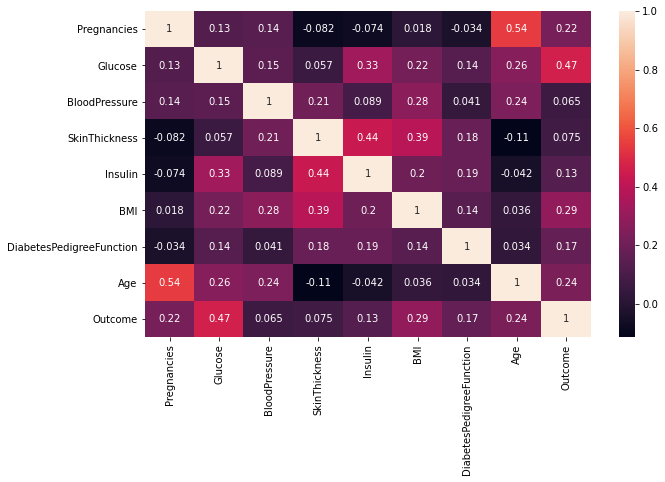

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlation = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)

* We need to set an absolute value, say 0.5 as the threshold for selecting the variables.
* If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable.

# 1.2 Chi-square Test

* The Chi-square test is used for categorical features in a dataset.
* We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 

### phik Library

Can be found here: https://phik.readthedocs.io/en/latest/

Install the library:
* !pip install phik
* conda install -c conda-forge phik


In [3]:
import pandas as pd
df = pd.read_csv('mushrooms.csv')
# df = pd.read_csv('abalone_data.txt', header=None)
array = df.values
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
import phik
cor = df.phik_matrix()

C:\Users\abpe\Anaconda3\lib\site-packages\phik\data_quality.py:78: UserWarning: Not enough unique value for variable veil-type for analysis 1. Dropping this column
  warnings.warn(


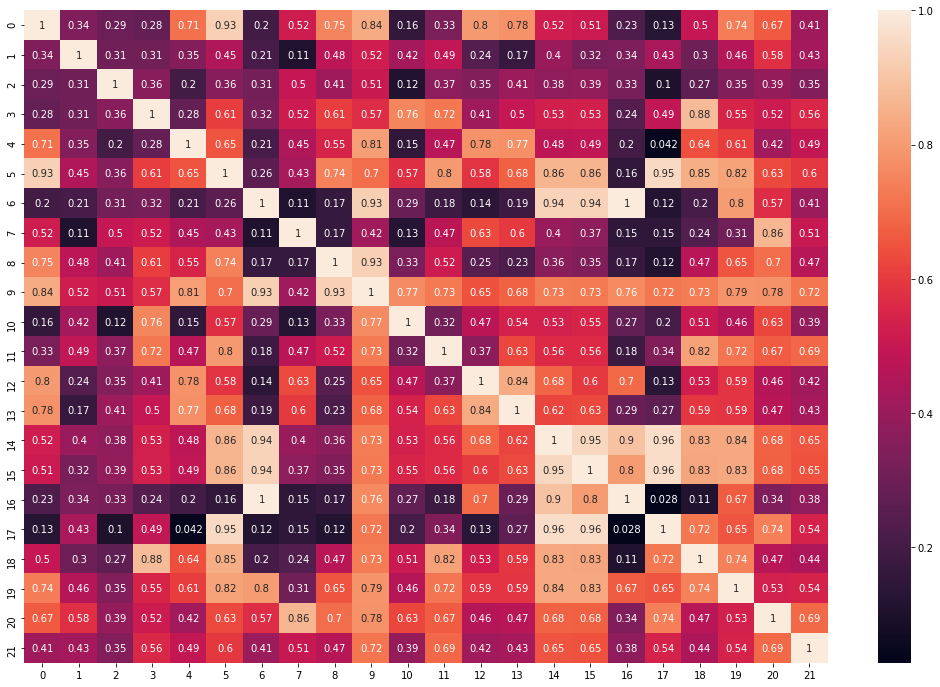

In [5]:
plt.figure(figsize=(18,12))
sns.heatmap(cor.values, annot=True)

# 1.3 Variance Threshold

* The variance threshold is a simple baseline approach for feature selection.
* It removes all features that their variances do not meet a threshold.
* For example, it removes all zero-variance features --> features that have the same value in all samples
* We assume that features with a higher variance may contain more useful information.

In [25]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_trans = scaler.fit_transform(X)

var_thresh = VarianceThreshold(threshold=0.02)
var_thresh.fit(X_trans)
var_thresh.get_support()

array([ True,  True,  True,  True, False, False, False,  True])

# 2. Wrapper Methods 

* Wrappers require some method to search the space of all possible subsets of features.
* It assesses the quality of the selected features by learning and evaluating a classifier with that feature subset.
* It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.

**Note**: The wrapper methods usually result in a better predictive accuracy than filter methods.

# 2.1 Forward Feature Selection

* This is an iterative method wherein we start with the best performing variable against the target.
* Next, we select another variable that gives the best performance in combination with the first selected variable.
* This process continues until the preset criterion is achieved.

In [26]:
# !pip install mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=500, n_jobs=-1)
lr.fit(X, y)
print('All features: {}'.format(lr.score(X, y)))

ffs = SequentialFeatureSelector(lr, k_features='best', cv=5, forward=True, n_jobs=-1)
ffs.fit(X, y)
features = list(ffs.k_feature_names_)
features = list(map(int, features))
lr.fit(X[:, features], y)
print('With feature selection: {}'.format(lr.score(X[:, features], y)))
print('selected features: {}'.format(features))
pd.DataFrame.from_dict(ffs.get_metric_dict()).T

All features: 0.78125
With feature selection: 0.7760416666666666
selected features: [0, 1, 2, 4, 5, 7]


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7077922077922078, 0.7077922077922078, 0.766...",0.747475,"(1,)",0.04233,0.0329342,0.0164671
2,"(1, 5)","[0.7727272727272727, 0.7337662337662337, 0.766...",0.759121,"(1, 5)",0.0252907,0.019677,0.00983852
3,"(1, 5, 7)","[0.7727272727272727, 0.7337662337662337, 0.740...",0.768305,"(1, 5, 7)",0.0353201,0.0274803,0.0137401
4,"(1, 4, 5, 7)","[0.7662337662337663, 0.7337662337662337, 0.753...",0.768296,"(1, 4, 5, 7)",0.0312132,0.0242849,0.0121425
5,"(0, 1, 4, 5, 7)","[0.7532467532467533, 0.7402597402597403, 0.785...",0.770877,"(0, 1, 4, 5, 7)",0.0260114,0.0202378,0.0101189
6,"(0, 1, 2, 4, 5, 7)","[0.7597402597402597, 0.7597402597402597, 0.766...",0.77479,"(0, 1, 2, 4, 5, 7)",0.0220048,0.0171204,0.00856022
7,"(0, 1, 2, 4, 5, 6, 7)","[0.7727272727272727, 0.7597402597402597, 0.753...",0.77479,"(0, 1, 2, 4, 5, 6, 7)",0.0255509,0.0198794,0.00993972
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7727272727272727, 0.7467532467532467, 0.753...",0.772193,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0287503,0.0223687,0.0111843


# 2.2 Backward Feature Elimination

* This method works exactly opposite to the Forward Feature Selection method. 
* We start with all the features available and build a model.
* Next, we remove the variable from the model which gives the best performance.
* This process is continued until the preset criterion is achieved.

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector

lr.fit(X, y)
lr.fit(X, y)
print('All features: {}'.format(lr.score(X, y)))

bfs = SequentialFeatureSelector(lr, k_features='best', cv=5, forward=False, n_jobs=-1)
bfs.fit(X, y)
features = list(bfs.k_feature_names_)
features = list(map(int, features))
lr.fit(X[:, features], y)
print('With feature selection: {}'.format(lr.score(X[:, features], y)))
print('selected features: {}'.format(features))
pd.DataFrame.from_dict(bfs.get_metric_dict()).T

All features: 0.78125
With feature selection: 0.78125
selected features: [0, 1, 2, 4, 5, 6, 7]


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7727272727272727, 0.7467532467532467, 0.753...",0.772193,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0287503,0.0223687,0.0111843
7,"(0, 1, 2, 4, 5, 6, 7)","[0.7727272727272727, 0.7597402597402597, 0.753...",0.77479,"(0, 1, 2, 4, 5, 6, 7)",0.0255509,0.0198794,0.00993972
6,"(0, 1, 2, 4, 5, 7)","[0.7597402597402597, 0.7597402597402597, 0.766...",0.77479,"(0, 1, 2, 4, 5, 7)",0.0220048,0.0171204,0.00856022
5,"(0, 1, 2, 5, 7)","[0.7662337662337663, 0.7597402597402597, 0.759...",0.772176,"(0, 1, 2, 5, 7)",0.0182811,0.0142233,0.00711165
4,"(1, 2, 5, 7)","[0.7727272727272727, 0.7597402597402597, 0.740...",0.768271,"(1, 2, 5, 7)",0.0239337,0.0186212,0.00931061
3,"(1, 5, 7)","[0.7727272727272727, 0.7337662337662337, 0.740...",0.768305,"(1, 5, 7)",0.0353201,0.0274803,0.0137401
2,"(1, 5)","[0.7727272727272727, 0.7337662337662337, 0.766...",0.759121,"(1, 5)",0.0252907,0.019677,0.00983852
1,"(1,)","[0.7077922077922078, 0.7077922077922078, 0.766...",0.747475,"(1,)",0.04233,0.0329342,0.0164671


# 2.3 Exhaustive Feature Selection

* This is one of the most robust feature selection methods.
* It tries every possible combination of the variables.

In [29]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(solver='lbfgs', random_state=12, max_iter=500, n_jobs=-1)
efs = ExhaustiveFeatureSelector(lr,
                               min_features=4,
                               max_features=8,
                               scoring='roc_auc',
                               cv=2)

efs = efs.fit(X, y)
selected_features = X[:, list(efs.best_idx_)]
print('Selected features: {}'.format(list(efs.best_idx_)))
pd.DataFrame.from_dict(efs.get_metric_dict()).T

Features: 163/163

Selected features: [0, 1, 2, 4, 5, 6, 7]


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0, 1, 2, 3)","[0.7724477611940298, 0.8392835820895523]",0.805866,"(0, 1, 2, 3)",0.143786,0.0334179,0.0334179
1,"(0, 1, 2, 4)","[0.7705671641791045, 0.8398805970149255]",0.805224,"(0, 1, 2, 4)",0.149116,0.0346567,0.0346567
2,"(0, 1, 2, 5)","[0.8004776119402985, 0.8537313432835821]",0.827104,"(0, 1, 2, 5)",0.114566,0.0266269,0.0266269
3,"(0, 1, 2, 6)","[0.7815522388059701, 0.8422089552238806]",0.811881,"(0, 1, 2, 6)",0.130492,0.0303284,0.0303284
4,"(0, 1, 2, 7)","[0.7723582089552239, 0.8425074626865672]",0.807433,"(0, 1, 2, 7)",0.150914,0.0350746,0.0350746
...,...,...,...,...,...,...,...
158,"(0, 1, 2, 4, 5, 6, 7)","[0.8097014925373134, 0.8601791044776118]",0.83494,"(0, 1, 2, 4, 5, 6, 7)",0.108594,0.0252388,0.0252388
159,"(0, 1, 3, 4, 5, 6, 7)","[0.8086865671641792, 0.8568656716417911]",0.832776,"(0, 1, 3, 4, 5, 6, 7)",0.103649,0.0240896,0.0240896
160,"(0, 2, 3, 4, 5, 6, 7)","[0.7545970149253731, 0.7626268656716417]",0.758612,"(0, 2, 3, 4, 5, 6, 7)",0.0172748,0.00401493,0.00401493
161,"(1, 2, 3, 4, 5, 6, 7)","[0.8045671641791045, 0.8520597014925373]",0.828313,"(1, 2, 3, 4, 5, 6, 7)",0.102172,0.0237463,0.0237463


# 2.4 Recursive Feature Elimination

* The RFE recursively removes features and then builds a model on the remained features.
* RFE checks the model accuracy to see which features are the best to predict the target label.
* Learn more about RFE class in scikit-learn:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [30]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE

lr = LogisticRegression()
lr.fit(X, y)
print('All features: {}'.format(lr.score(X, y)))

rfe = RFE(lr, n_features_to_select=5, step=1)
rfe.fit(X, y)
print("Num Features: {}".format(rfe.n_features_))
print("Selected Features: {}".format(rfe.support_))
print("Feature Ranking: {}".format(rfe.ranking_))

lr.fit(X[:, rfe.support_], y)
print('With feature selection: {}'.format(lr.score(X[:, rfe.support_], y)))
# pd.DataFrame.from_dict(rfe.get_metric_dict()).T

All features: 0.7825520833333334
Num Features: 5
Selected Features: [ True  True False False False  True  True  True]
Feature Ranking: [1 1 2 3 4 1 1 1]
With feature selection: 0.7799479166666666


# 3. Embedded Methods

* These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features.
* Embedded methods are iterative.
* They takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

# 3.1 Random Forest Importance

* Random Forest (bagging) methods can be used to estimate the importance of features.
* Also, we can use **ExtraTreesClassifier**. Learn more about **ExtraTreesClassifier** class in scikit-learn here:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html<br>

"*ExtraTreesClassifier class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.*"

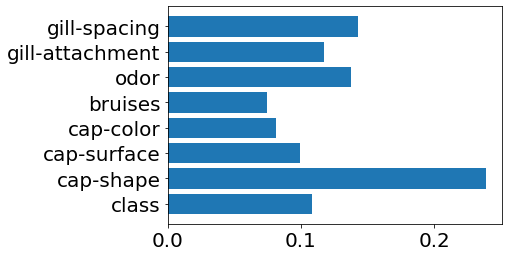

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X, y)

plt.barh(range(8), etc.feature_importances_)
plt.yticks(range(8), df.columns)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Self Study
    
    
* Please study the rest of the slides and ask your questions in the class, if you have any.
* Most of the topics below have been already covered in the previous lectures.
* However, thsi is just a review on them and introducing some additional related subjects.

# Automate Machine Learning Workfows

* Can you list standard steps in a machine learning project?

1. Statndard steps in a machine learning project can be automated.
2. In scikit-learn *pipelines* can define and automate these steps.

In this section you will will learn:
* how to use *pipelines*.
* how to apply a data preparation and modeling pipeline.
* how to apply a feature extraction and modeling pipeline.


# 1. Automating Machine Learning Workfows

* The standard steps in applied machine learning help to overcome common problems.
* scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together.
* Learn more about **Pipelines** in scikit-learn here:<br>
http://scikit-learn.org/stable/modules/pipeline.html <br>

The goal is to ensure that all of the steps in the pipeline are constrained to the data available
for the evaluation.

# 2. Data Preparation and Modeling Pipeline

* A common mistake in applied machine learning is leaking data from your training dataset to your test dataset.
* To avoid this, you need a strong separation of training and test sets.
* Most of the data leakage happens in data preparation step. 
* For example, normalizing of standardizing your entire data would not be a correct preparaion (preprocessing) method. Because the training data would have been influenced by the data in the test set!

Pipelines help preventing data leakage in the evaluation process by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure.

# Implementation of Data Preparation Pipeline 

The below pipeline consists of two steps:
    1. Standardize the data.
    2. Learn a Logistic Regression model.

In [12]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [13]:
# # create pipeline
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('lr', LogisticRegression()))
# pipe = Pipeline(estimators)

In [14]:
# # evaluate pipeline
# kfold = KFold(n_splits=10, random_state=7)
# results = cross_val_score(pipe, X, Y, cv=kfold)
# print(results.mean())

# Improve Performance with Algorithm Tuning

* Machine learning models are parameterized so that their behavior can be tuned for a given problem.
* Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

In this lesson, you will see:
    1. The importance of algorithm parameter tuning to improve algorithm performance.
    2. How to use a grid search algorithm tuning strategy.
    3. How to use a random search algorithm tuning strategy.

# Machine Learning Algorithm Parameters

* Algorithm tuning is a final step in the process of applied machine learning before finalizing your model.
* It is sometimes called hyperparameter optimization. 
* Since this is an optimization problem, we need to use search based methods/strategies to find robust and good (set of) parameters.

scikit-learn provides two simple methods for algorithm parameter tuning:
    1. Grid Search Parameter Tuning.
    2. Random Search Parameter Tuning.

# 1. Random Search Parameter Tuning

* Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations.
* A model is constructed and evaluated for each combination of parameters chosen.
* You can perform a random search for algorithm parameters using the **RandomizedSearchCV** class:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Comparison Between GridSearchCV & RandomizedSearchCV

* The example below evaluates diffeerent random alpha values between 0 and 1 for the Ridge Regression algorithm on the standard diabetes dataset.
* A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).

In [15]:
import numpy as np
from pandas import read_csv
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

In [16]:
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth': range(1,20,2)}
dt = DecisionTreeClassifier()

tic = time.process_time()
gsearch = GridSearchCV(estimator=dt, param_grid=param_grid)
gsearch.fit(X, y)
toc = time.process_time()

print('GridSearchCV time: {}'.format(toc - tic))
print('GridSearchCV score: {}'.format(gsearch.best_score_))
print('GridSearchCV params: {}'.format(gsearch.best_estimator_))
print('')

tic = time.process_time()
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=100, random_state=42)
rsearch.fit(X, y)
toc = time.process_time()

print('RandomizedSearchCV time: {}'.format(toc - tic))
print('RandomizedSearchCV score: {}'.format(rsearch.best_score_))
print('RandomizedSearchCV params: {}'.format(rsearch.best_estimator_))

GridSearchCV time: 47.765625
GridSearchCV score: 0.7566250742721332
GridSearchCV params: DecisionTreeClassifier(max_depth=19, max_leaf_nodes=44, min_samples_split=3)

RandomizedSearchCV time: 1.453125
RandomizedSearchCV score: 0.7526865291571173
RandomizedSearchCV params: DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_split=4)


<font size="25"><center>Thank you!